In [15]:
import pandas as pd

In [16]:
df = pd.read_csv("online.csv")

In [17]:
df.head(5)

,Unnamed: 0,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications,Unnamed: 13,9,#@%
0,0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate,Yes,NaN,swiggyscount
1,1,Yes,No Income,12.9770,Single,Male,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
2,2,Yes,No Income,12.9770,Single,Female,Student,NaN,Positive,560009,NaN,77.5773,Post Graduate,Yes,NaN,*7435
3,3,Yes,No Income,13.0019,Single,Female,Student,NaN,Positive,560003,NaN,77.5713,Post Graduate,Yes,NaN,*7435
4,4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,NaN,Positive,560015,NaN,77.5284,School,Yes,NaN,*7435


In [18]:
df.shape

(388, 16)

In [19]:
df.columns

Index(['Unnamed: 0', 'order_status', 'Monthly Income', 'latitude',
       'Marital Status', 'Gender', 'employment_status', 'Family size',
       'Reviews', 'Pin code', 'Age', 'longitude', 'Educational Qualifications',
       'Unnamed: 13', '9', '#@%'],
      dtype='object')

In [20]:
df.isnull().sum()

Unnamed: 0                      0
order_status                    0
Monthly Income                  0
latitude                        0
Marital Status                  0
Gender                          0
employment_status               0
Family size                    19
Reviews                         0
Pin code                        0
Age                            19
longitude                       0
Educational Qualifications      0
Unnamed: 13                     0
9                             388
#@%                           382
dtype: int64

In [21]:
df.drop(columns=["9","#@%","Unnamed: 13", "Unnamed: 0"], inplace=True)

In [22]:
df.shape

(388, 12)

In [23]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                   19
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

<AxesSubplot:ylabel='Family size'>

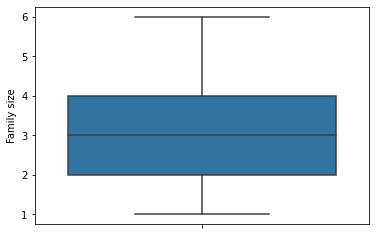

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y="Family size", data=df)



In [25]:
family_mean=int(df["Family size"].mean())

In [26]:
df["Family size"].fillna(family_mean,inplace=True)


In [27]:
df.isnull().sum()

order_status                   0
Monthly Income                 0
latitude                       0
Marital Status                 0
Gender                         0
employment_status              0
Family size                    0
Reviews                        0
Pin code                       0
Age                           19
longitude                      0
Educational Qualifications     0
dtype: int64

In [28]:
df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,NaN,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,NaN,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,NaN,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,NaN,77.5284,School


<AxesSubplot:ylabel='Age'>

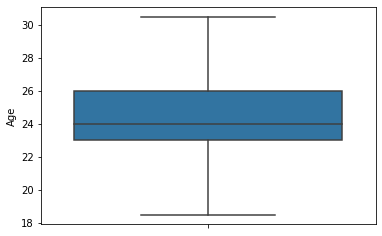

In [46]:
sns.boxplot(y="Age", data=df)

In [30]:
age_median = int(df["Age"].median())

In [31]:
df["Age"].fillna(age_median,inplace=True)


In [32]:
df.isnull().sum()

order_status                  0
Monthly Income                0
latitude                      0
Marital Status                0
Gender                        0
employment_status             0
Family size                   0
Reviews                       0
Pin code                      0
Age                           0
longitude                     0
Educational Qualifications    0
dtype: int64

In [33]:
df.describe()

,latitude,Family size,Pin code,Age,longitude
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,12.972058,3.283505,560040.113402,24.634021,77.600160
std,0.044489,1.322450,31.399609,2.897932,0.051354
min,12.865200,1.000000,560001.000000,18.000000,77.484200
25%,12.936900,2.000000,560010.750000,23.000000,77.565275
50%,12.977000,3.000000,560033.500000,24.000000,77.592100
75%,12.997025,4.000000,560068.000000,26.000000,77.630900
max,13.102000,6.000000,560109.000000,33.000000,77.758200


In [34]:
q1=int(df.describe()["Age"]["25%"])
q3=int(df.describe()["Age"]["75%"])
IQR=q3-q1
print(IQR)

3


In [35]:
lower_limit =q1-1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit

18.5

In [36]:
upper_limit

30.5

In [37]:
df[(df["Age"]>upper_limit) | (df["Age"]<lower_limit)].count()

order_status                  24
Monthly Income                24
latitude                      24
Marital Status                24
Gender                        24
employment_status             24
Family size                   24
Reviews                       24
Pin code                      24
Age                           24
longitude                     24
Educational Qualifications    24
dtype: int64

In [38]:
df[(df["Age"]>upper_limit) | (df["Age"]<lower_limit)]

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
16,Yes,25001 to 50000,12.9706,Married,Male,Employee,3.0,Positive,560075,32.0,77.6529,Graduate
26,Yes,10001 to 25000,12.9820,Married,Male,Self Employeed,3.0,Negative,560008,32.0,77.6256,School
31,No,More than 50000,13.0019,Married,Female,Employee,1.0,Positive,560003,32.0,77.5713,Graduate
33,No,No Income,13.0140,Married,Female,House wife,3.0,Positive,560012,32.0,77.5658,Uneducated
71,Yes,25001 to 50000,12.9706,Married,Male,Employee,3.0,Positive,560075,32.0,77.6529,Graduate
74,Yes,More than 50000,12.9037,Married,Male,Employee,5.0,Positive,560061,32.0,77.5376,Graduate
98,Yes,More than 50000,12.9369,Married,Male,Employee,6.0,Positive,560095,32.0,77.6407,Post Graduate
105,Yes,More than 50000,13.0487,Married,Male,Self Employeed,6.0,Positive,560024,31.0,77.5923,School
139,Yes,No Income,12.9889,Married,Female,House wife,5.0,Positive,560020,32.0,77.5741,School
147,Yes,No Income,12.9635,Single,Male,Student,5.0,Positive,560002,18.0,77.5821,Graduate


In [39]:
df[(df["Age"]<upper_limit) & (df["Age"]>lower_limit)].count()

order_status                  364
Monthly Income                364
latitude                      364
Marital Status                364
Gender                        364
employment_status             364
Family size                   364
Reviews                       364
Pin code                      364
Age                           364
longitude                     364
Educational Qualifications    364
dtype: int64

In [40]:
new_df=df[(df["Age"]<upper_limit) & (df["Age"]>lower_limit)]
new_df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School


<AxesSubplot:ylabel='Age'>

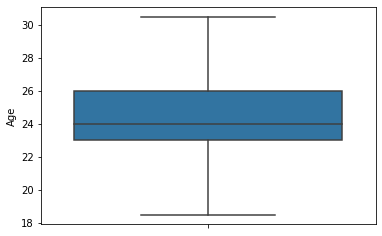

In [47]:
sns.boxplot(y="Age", data=df)

In [42]:
df.head()

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
2,Yes,No Income,12.9770,Single,Female,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
3,Yes,No Income,13.0019,Single,Female,Student,3.0,Positive,560003,24.0,77.5713,Post Graduate
4,Yes,More than 50000,13.0626,Married,Male,Self Employeed,3.0,Positive,560015,24.0,77.5284,School


<AxesSubplot:ylabel='Age'>

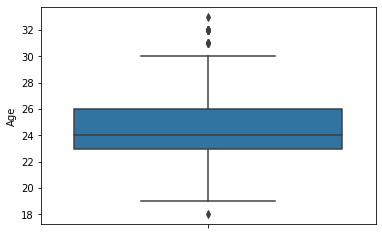

In [43]:
sns.boxplot(y="Age", data=df)

In [44]:
df["Age"].clip(lower_limit,upper_limit,inplace=True)

<AxesSubplot:ylabel='Age'>

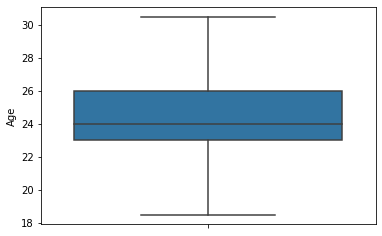

In [45]:
sns.boxplot(y="Age", data=df)



In [48]:
df.head(2)

,order_status,Monthly Income,latitude,Marital Status,Gender,employment_status,Family size,Reviews,Pin code,Age,longitude,Educational Qualifications
0,Yes,25001 to 50000,13.0262,Married,Male,Employee,5.0,Positive,560045,28.0,77.6200,Post Graduate
1,Yes,No Income,12.9770,Single,Male,Student,3.0,Positive,560009,24.0,77.5773,Post Graduate
